In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report, confusion_matrix, recall_score
from imblearn.over_sampling import RandomOverSampler

import warnings
warnings.filterwarnings('ignore')

# Recap

In [3]:
df = pd.read_csv(r'healthcare-dataset-stroke-data.csv')

In [4]:
maleBMI = df[df['gender']=='Male']['bmi'].mean()
femaleBMI = df[df['gender']=='Female']['bmi'].mean()
otherBMI = df[df['gender']=='Other']['bmi'].mean()

df.loc[df.gender=='Male'] = df.loc[df.gender=='Male'].fillna(maleBMI)
df.loc[df.gender=='Female'] = df.loc[df.gender=='Female'].fillna(femaleBMI)
df.loc[df.gender=='Other'] = df.loc[df.gender=='Other'].fillna(otherBMI)

In [5]:
df['gender'] = df['gender'].map({'Male':0, 'Female':1, 'Other':2})
df['ever_married'] = df['ever_married'].map({'No':0, 'Yes':1})
df['work_type'] = df['work_type'].map({'Govt_job':0, 'Never_worked':1, 'Private':2, 'Self-employed':3, 'children':4})
df['Residence_type'] = df['Residence_type'].map({'Rural':0, 'Urban':1})
df['smoking_status'] = df['smoking_status'].map({'Unknown':0, 'formerly smoked':1, 'never smoked':2, 'smokes':3})

In [6]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,0,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,51676,1,61.0,0,0,1,3,0,202.21,29.065758,2,1
2,31112,0,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,60182,1,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,1665,1,79.0,1,0,1,3,0,174.12,24.000000,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,1,80.0,1,0,1,2,1,83.75,29.065758,2,0
5106,44873,1,81.0,0,0,1,3,1,125.20,40.000000,2,0
5107,19723,1,35.0,0,0,1,3,0,82.99,30.600000,2,0
5108,37544,0,51.0,0,0,1,2,0,166.29,25.600000,1,0


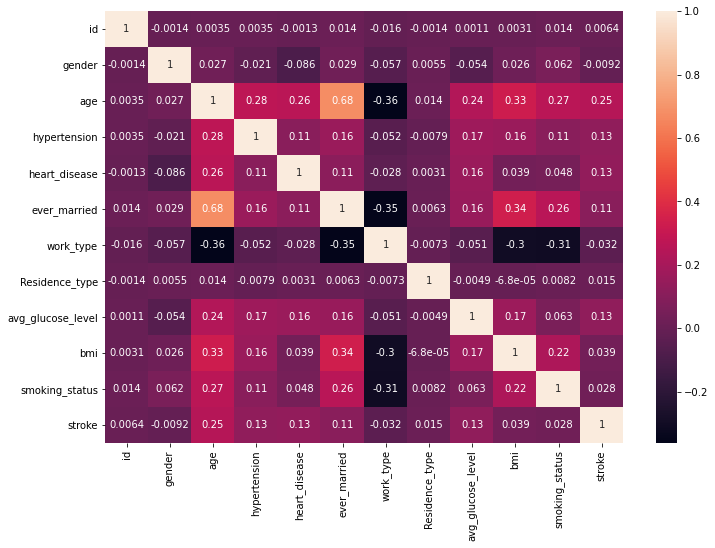

In [7]:
fig = plt.figure()
axes = fig.add_axes([0,0,1.5,1.5])
sns.heatmap(df.corr(),annot=True)

In [8]:
df=df.drop('id',axis=1)
X=df.drop('stroke',axis=1)
y=df.stroke
print(X.shape)
print(y.shape)

(5110, 10)
(5110,)


In [9]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=42)
X_train_res, y_train_res = RandomOverSampler().fit_resample(X_train, y_train)

In [10]:
print('Class 0 before oversampling:', sum(y_train==0),'\nClass 1 before oversampling:', sum(y_train==1))
print('Class 0 after oversampling:', sum(y_train_res==0),'\nClass 1 after oversampling:', sum(y_train_res==1))

Class 0 before oversampling: 3901 
Class 1 before oversampling: 187
Class 0 after oversampling: 3901 
Class 1 after oversampling: 3901


# Results

In [11]:
logreg = LogisticRegression(solver='lbfgs',max_iter=1000)
logreg.fit(X_train_res, y_train_res)
threshold = logreg.predict_proba(X_test)[:,1].mean()
threshold

0.33216032250052685

In [12]:
pred_log = (logreg.predict_proba(X_test)[:,1]>threshold).astype(int)
print(classification_report(y_test,pred_log))

              precision    recall  f1-score   support

           0       0.99      0.59      0.74       960
           1       0.13      0.94      0.23        62

    accuracy                           0.61      1022
   macro avg       0.56      0.76      0.48      1022
weighted avg       0.94      0.61      0.71      1022



In [13]:
print(confusion_matrix(y_test,pred_log))

[[567 393]
 [  4  58]]


# Enhancements

### Scaling?

In [14]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
MinMaxScaler = MinMaxScaler()
StandardScaler = StandardScaler()

In [15]:
# MinMaxScaler
MinMaxScaler.fit(X_train_res)
X_scaled = MinMaxScaler.transform(X_train_res)
MinMaxScaler.fit(X_test)
X_scaled_test = MinMaxScaler.transform(X_test)

In [16]:
threshold = logreg.predict_proba(X_scaled_test)[:,1].mean()
threshold

0.007497252205852635

In [17]:
pred_log = (logreg.predict_proba(X_scaled_test)[:,1]>threshold).astype(int)
#pred_log = logreg.predict(X_scaled_test)
print(classification_report(y_test,pred_log))

              precision    recall  f1-score   support

           0       0.94      0.52      0.67       960
           1       0.06      0.47      0.11        62

    accuracy                           0.52      1022
   macro avg       0.50      0.49      0.39      1022
weighted avg       0.88      0.52      0.64      1022



In [18]:
print(confusion_matrix(y_test,pred_log))

[[500 460]
 [ 33  29]]


In [19]:
# StandardScaler
StandardScaler.fit(X_train_res)
X_scaled = StandardScaler.transform(X_train_res)
StandardScaler.fit(X_test)
X_scaled_test = StandardScaler.transform(X_test)

In [20]:
threshold = logreg.predict_proba(X_scaled_test)[:,1].mean()
threshold

0.010144475677019878

In [21]:
pred_log = (logreg.predict_proba(X_scaled_test)[:,1]>threshold).astype(int)
#pred_log = logreg.predict(X_scaled_test)
print(classification_report(y_test,pred_log))

              precision    recall  f1-score   support

           0       0.96      0.86      0.91       960
           1       0.18      0.47      0.26        62

    accuracy                           0.84      1022
   macro avg       0.57      0.67      0.58      1022
weighted avg       0.91      0.84      0.87      1022



In [22]:
print(confusion_matrix(y_test,pred_log))

[[828 132]
 [ 33  29]]


there is improvement in accuracy (Standard Scaler) but recall has dropped significantly.

### Ensemble learning?

In [23]:
# KNN 
knn = KNeighborsClassifier(n_neighbors=27)
knn.fit(X_train_res,y_train_res)
pred_knn = (knn.predict_proba(X_test)[:,1]>0.1).astype(int)

# Decision Tree
dct = DecisionTreeClassifier(random_state=0)
dct.fit(X_train_res, y_train_res)
pred_dct = dct.predict(X_test)

# Logistic Regression
logreg = LogisticRegression(solver='lbfgs',max_iter=1000)
logreg.fit(X_train_res, y_train_res)
threshold = logreg.predict_proba(X_test)[:,1].mean()
pred_log = (logreg.predict_proba(X_test)[:,1]>threshold).astype(int)

In [23]:
# Hard Voting
from sklearn.ensemble import VotingClassifier
hard_voting = VotingClassifier(voting='hard', estimators=[('logreg',logreg),('dct',dct),('knn',knn)])
hard_voting.fit(X_train_res, y_train_res)
pred_voteH = hard_voting.predict(X_test)

# Soft Voting
soft_voting = VotingClassifier(voting='soft', estimators=[('logreg',logreg),('dct',dct),('knn',knn)])
soft_voting.fit(X_train_res, y_train_res)
pred_voteS = soft_voting.predict(X_test)

In [24]:
# Stacking
from sklearn.ensemble import StackingClassifier
stacking = StackingClassifier(estimators=[('logreg',logreg),('dct',dct),('knn',knn)])
stacking.fit(X_train_res, y_train_res)
pred_stack = stacking.predict(X_test)

In [25]:
# AdaBoost
from sklearn.ensemble import AdaBoostClassifier
adaboost = AdaBoostClassifier() # 'playing' with n_estimators and learning_rate didnt provide better results.
adaboost.fit(X_train_res, y_train_res)
pred_ada = adaboost.predict(X_test)

In [26]:
# XGBoost
from xgboost import XGBClassifier
xgboost = XGBClassifier()
xgboost.fit(X_train_res, y_train_res)
pred_xgb = xgboost.predict(X_test)

[20:37:02] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [27]:
for model in [logreg, dct, knn, hard_voting, soft_voting, stacking, adaboost, xgboost]:
    print(model.__class__.__name__,"    ", model.score(X_test, y_test))

LogisticRegression      0.7485322896281801
DecisionTreeClassifier      0.913894324853229
KNeighborsClassifier      0.7093933463796478
VotingClassifier      0.7876712328767124
VotingClassifier      0.8669275929549902
StackingClassifier      0.913894324853229
AdaBoostClassifier      0.7338551859099804
XGBClassifier      0.9129158512720157


In [28]:
names = ["LogisticRegression", "DecisionTreeClassifier", "KNeighborsClassifier", "HardVotingClassifier", 
         "SoftVotingClassifier", "StackingClassifier", "AdaBoostClassifier", "XGBClassifier"]
preds = [pred_log, pred_dct, pred_knn, pred_voteH, pred_voteS, pred_stack, pred_ada, pred_xgb]
for name, pred in zip(names,preds):
    print(name)
    print(classification_report(y_test,pred))
    print()

LogisticRegression
              precision    recall  f1-score   support

           0       0.99      0.59      0.74       960
           1       0.13      0.92      0.22        62

    accuracy                           0.61      1022
   macro avg       0.56      0.75      0.48      1022
weighted avg       0.94      0.61      0.71      1022


DecisionTreeClassifier
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       960
           1       0.19      0.13      0.15        62

    accuracy                           0.91      1022
   macro avg       0.57      0.55      0.55      1022
weighted avg       0.90      0.91      0.91      1022


KNeighborsClassifier
              precision    recall  f1-score   support

           0       0.99      0.59      0.74       960
           1       0.12      0.89      0.22        62

    accuracy                           0.61      1022
   macro avg       0.56      0.74      0.48      1022
weighted 

There are improvements in accuracy, but there is no improvement in recall.

In [24]:
type(pred_knn)

numpy.ndarray

In [25]:
X_test.shape

(1022, 10)

In [26]:
y_test.shape

(1022,)